In [1]:
from pymatgen.electronic_structure.boltztrap2 import BoltztrapAnalyzer, BoltztrapRunner
import matplotlib.pyplot as plt

In [4]:
#define doping
doping = [1e16, 1e17, 1e18, 1e19, 1e20]
pn_doping = []
pn_doping.extend([i for i in doping])
pn_doping.extend([0-i for i in doping])
#define Temp
T=300
#define path
base_dir = '/Users/yao/Google Drive/data/216/DOS-k20'
compounds = ['Cs2Sn1I6','Rb2Sn1I6', 'Cs2Pd1I6', 'Cs2Pt1I6','Rb2Pt1I6','K2Pt1I6','Cs2Te1I6']
for compound in compounds:
    path_dir = base_dir+'/'+compound+'/'+'boltztrap'
    b_ana = BoltztrapAnalyzer.from_files(path_dir = path_dir, doping_levels=pn_doping)
    mass = b_ana.get_average_eff_mass_vbm_cbm(output='average')
    print(compound, mass['n'][300], mass['p'][300])

Cs2Sn1I6 -0.33179589161 1.49988697501
Rb2Sn1I6 -0.290822861448 1.34291812258
Cs2Pd1I6 -0.465887624848 1.36974561147
Cs2Pt1I6 -0.51119450191 1.44704558454
Rb2Pt1I6 -0.45297666954 1.24521252259
K2Pt1I6 -0.403228756153 1.15084691493
Cs2Te1I6 -0.400705186904 1.50883575533


In [2]:
#define doping
doping = [1e16, 1e17, 1e18, 1e19, 1e20]
pn_doping = []
pn_doping.extend([i for i in doping])
pn_doping.extend([0-i for i in doping])
#define Temp
T=300
#define path
base_dir = '/Users/yao/Google Drive/data/216/DOS-tetra-k18_18_12'
compounds = ['Cs2Sn1I6','Rb2Sn1I6', 'Cs2Pd1I6', 'Cs2Pt1I6','Rb2Pt1I6','K2Pt1I6','Cs2Te1I6']
for compound in compounds:
    path_dir = base_dir+'/'+compound+'/'+'boltztrap'
    b_ana = BoltztrapAnalyzer.from_files(path_dir = path_dir, doping_levels=pn_doping)
    mass = b_ana.get_average_eff_mass_vbm_cbm(output='tensor')
    print(compound, mass['n'][300][0,0], mass['n'][300][1,1], mass['n'][300][2,2])
    print(compound, mass['p'][300][0,0], mass['p'][300][1,1], mass['p'][300][2,2])

Cs2Sn1I6 -0.444977242205 -0.444977242205 -0.423362959392
Cs2Sn1I6 1.26959782629 1.26959782629 2.79314404262
Rb2Sn1I6 -0.646547786909 -0.646547786909 -0.635351241086
Rb2Sn1I6 2.60715980823 2.60715980823 2.16797153967
Cs2Pd1I6 -0.463794392426 -0.463794392426 -0.47137564629
Cs2Pd1I6 1.31646216807 1.31646216807 1.50272961935
Cs2Pt1I6 -0.523293017912 -0.523293017912 -0.532767134249
Cs2Pt1I6 1.38227175791 1.38227175791 1.57119659455
Rb2Pt1I6 -0.593240611243 -0.593240611243 -0.655037106024
Rb2Pt1I6 2.5014030973 2.5014030973 1.32141588943
K2Pt1I6 -0.844204226135 -0.844204226135 -0.834035071154
K2Pt1I6 1.78800149902 1.78800149902 2.55090510281
Cs2Te1I6 -0.391903385764 -0.391903385764 -0.386418053137
Cs2Te1I6 1.48301318689 1.48301318689 1.55108283487


In [12]:
#k-mesh convergence test
#define doping
doping = [1e16, 1e17, 1e18, 1e19, 1e20]
pn_doping = []
pn_doping.extend([i for i in doping])
pn_doping.extend([0-i for i in doping])
#define Temp
T=300
#define path
base_dir = '/Users/yao/Google Drive/data/216/Cs2Sn1I6/BoltzTrap-k-test/k'
ks = [5,6,9,13,15,17,19,20,23,27,30]
mass_n = []
mass_p = []
for k in ks:
    path_dir = base_dir+str(k)+'/boltztrap'
    b_ana = BoltztrapAnalyzer.from_files(path_dir = path_dir, doping_levels=pn_doping)
    mass = b_ana.get_average_eff_mass_vbm_cbm(output='average')
    print(k, mass['n'][300], mass['p'][300])
    mass_n.append(mass['n'][300])
    mass_p.append(mass['p'][300])

5 0.328729935547 1.37998611331
6 0.321615099467 1.41874211381
9 0.335981751681 1.48700580049
13 0.336451662433 1.49432077623
15 0.317680808238 1.50164477496
17 0.330928095576 1.49950155352
19 0.330772723147 1.49981387834
20 0.33179589161 1.49988697501
23 0.327718571533 1.49895752858
27 0.329587658678 1.49989240073
30 0.329892888116 1.50148304133


[-0.35252429216244802, -2.5092352540856782, 1.8457092540767761, 1.9881526863546324, -3.7018318121533493, 0.31380108427072867, 0.26670324294786207, 0.57685496198673802, -0.65909774386268016, -0.092523800751945093, 0.0]


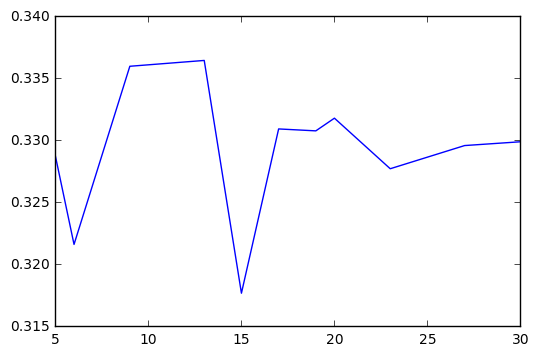

In [20]:
error_n = [(i-mass_n[-1])/mass_n[-1]*100 for i in mass_n]
print(error_n)
plt.plot(ks, mass_n)
plt.show()

[-8.0917948906080852, -5.5106135231111866, -0.96419609407806095, -0.4770127204638282, 0.010771592395442278, -0.13196871047330758, -0.11116762195149991, -0.1062993236652405, -0.16820121671948479, -0.10593796622989093, 0.0]


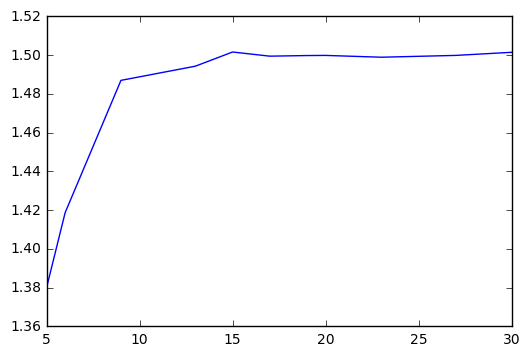

In [21]:
error_p = [(i-mass_p[-1])/mass_p[-1]*100 for i in mass_p]
print(error_p)
plt.plot(ks, mass_p)
plt.show()